# Exploratory Data Analysis (EDA)

In [86]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from scipy.signal import find_peaks
from scipy.stats import gamma
import statsmodels.api as sm
import warnings
from datetime import datetime
import statsmodels.api as sm

In [59]:
data = pd.read_csv("train_ML_IOT.csv")
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


## Organization of data

In [60]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


(           Junction      Vehicles            ID
 count  48120.000000  48120.000000  4.812000e+04
 mean       2.180549     22.791334  2.016330e+10
 std        0.966955     20.750063  5.944854e+06
 min        1.000000      1.000000  2.015110e+10
 25%        1.000000      9.000000  2.016042e+10
 50%        2.000000     15.000000  2.016093e+10
 75%        3.000000     29.000000  2.017023e+10
 max        4.000000    180.000000  2.017063e+10,
 None)

In [61]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Weekday'] = [datetime.weekday(date) for date in data.DateTime]
data['Year'] = [date.year for date in data.DateTime]
data['Month'] = [date.month for date in data.DateTime]
data['Day'] = [date.day for date in data.DateTime]
data['Hour'] = [date.hour for date in data.DateTime]
data['Week'] = [date.week for date in data.DateTime]
data['Quarter'] = [date.quarter for date in data.DateTime]
data["IsWeekend"] = data["Weekday"] >= 5

data.head(10)

,DateTime,Junction,Vehicles,ID,Weekday,Year,Month,Day,Hour,Week,Quarter,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,6,2015,11,1,0,44,4,True
1,2015-11-01 01:00:00,1,13,20151101011,6,2015,11,1,1,44,4,True
2,2015-11-01 02:00:00,1,10,20151101021,6,2015,11,1,2,44,4,True
3,2015-11-01 03:00:00,1,7,20151101031,6,2015,11,1,3,44,4,True
4,2015-11-01 04:00:00,1,9,20151101041,6,2015,11,1,4,44,4,True
5,2015-11-01 05:00:00,1,6,20151101051,6,2015,11,1,5,44,4,True
6,2015-11-01 06:00:00,1,9,20151101061,6,2015,11,1,6,44,4,True
7,2015-11-01 07:00:00,1,8,20151101071,6,2015,11,1,7,44,4,True
8,2015-11-01 08:00:00,1,11,20151101081,6,2015,11,1,8,44,4,True
9,2015-11-01 09:00:00,1,12,20151101091,6,2015,11,1,9,44,4,True


### Missing Values

In [62]:
def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display((data.isnull().sum()).sum())
    
    if (data.isnull().sum()).sum() != 0 :
    
        for column in columns :

            # Fill Missing Values with Specific Value :
            if "Value_Fill" in fill_types :
                data[ column ] = data[ column ].fillna(fill_value)

            # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
            if "Forward_Fill" in fill_types :
                data[ column ] = data[ column ].ffill(axis = 0)

            # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
            if "Backward_Fill" in fill_types :
                data[ column ] = data[ column ].bfill(axis = 0)

        print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
        display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0

train = fill_missing_values(data, fill_value, fill_types, data.columns,"train")

Missing Values BEFORE REMOVAL in  train  data


0

In [63]:
data.isna().sum() # Null data amount

DateTime     0
Junction     0
Vehicles     0
ID           0
Weekday      0
Year         0
Month        0
Day          0
Hour         0
Week         0
Quarter      0
IsWeekend    0
dtype: int64

In [64]:
sns.set(rc={'figure.figsize':(18, 10)})

### Separating Junctions

In [65]:
junction_1 = data[data["Junction"]==1]
junction_2 = data[data["Junction"]==2]
junction_3 = data[data["Junction"]==3]
junction_4 = data[data["Junction"]==4]

junctions = [junction_1, junction_2, junction_3, junction_4]

### Statistical Values

In [66]:
i = 1
for j in junctions:
    print("Junction",i,"\n")
    print("Mean: ",j['Vehicles'].mean())
    print("Median: ",j['Vehicles'].median())
    print("Min: ",j['Vehicles'].min())
    print("Max: ",j['Vehicles'].max())
    print("Std: ",j['Vehicles'].std())
    print("Skewness: ",j['Vehicles'].skew())
    print("Kurtosis: ",j['Vehicles'].kurt(),"\n\n")
    i+=1

Junction 1 

Mean:  45.05290570175438
Median:  40.0
Min:  5
Max:  156
Std:  23.0083451392927
Skewness:  0.8012975778113662
Kurtosis:  0.19188209363777453 


Junction 2 

Mean:  14.253220942982455
Median:  13.0
Min:  1
Max:  48
Std:  7.401306635266316
Skewness:  1.2873364898588882
Kurtosis:  1.783596555414265 


Junction 3 

Mean:  13.694010416666666
Median:  11.0
Min:  1
Max:  180
Std:  10.436005075710996
Skewness:  3.490206183724324
Kurtosis:  27.36437504960055 


Junction 4 

Mean:  7.251611418047882
Median:  7.0
Min:  1
Max:  36
Std:  3.5214545458330613
Skewness:  1.3326967458513121
Kurtosis:  4.737325243604408 


### Trends of junctions 
Changes of traffic point over time

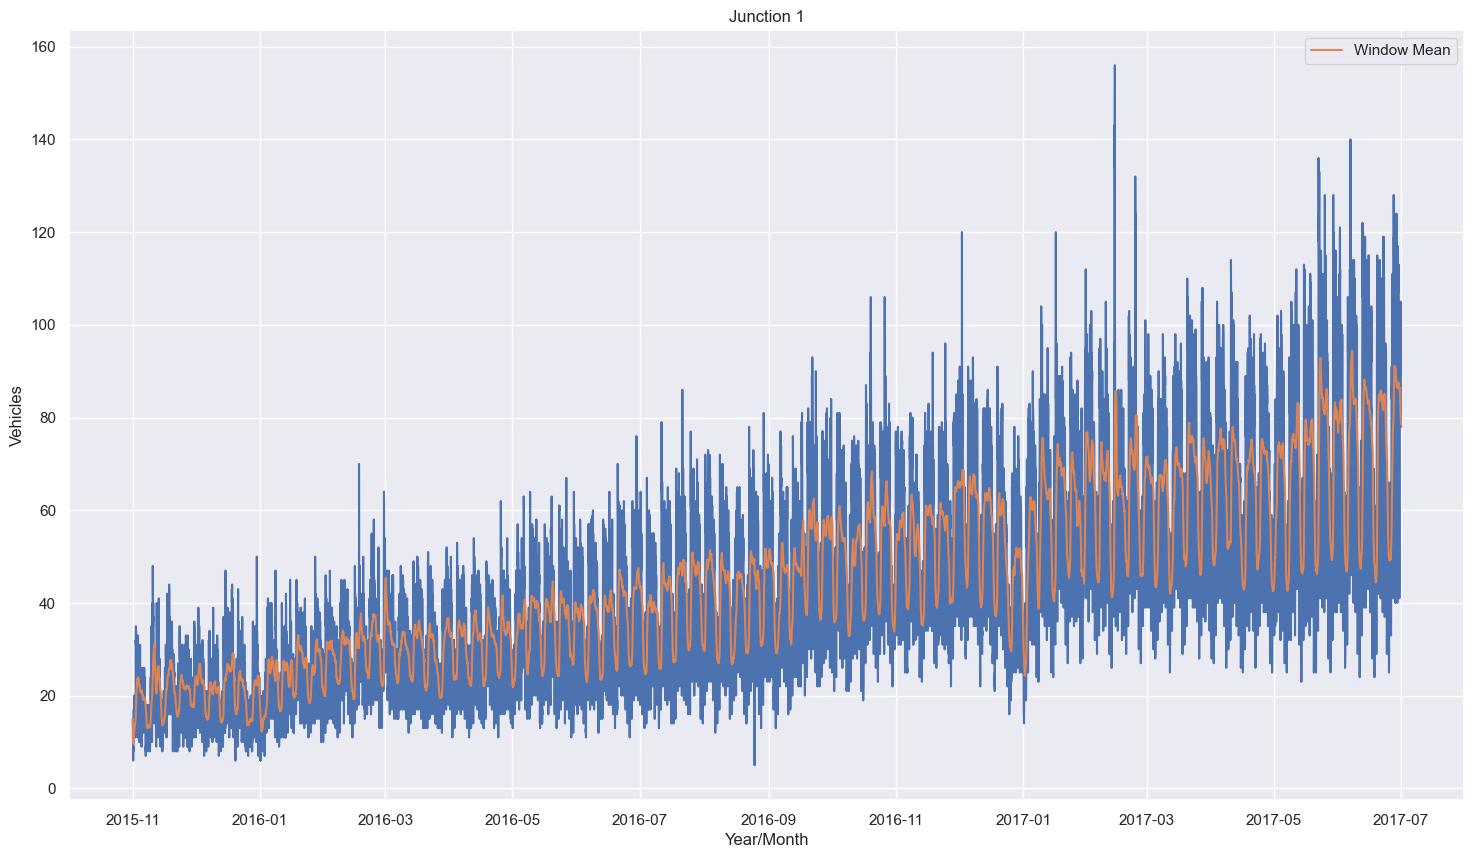

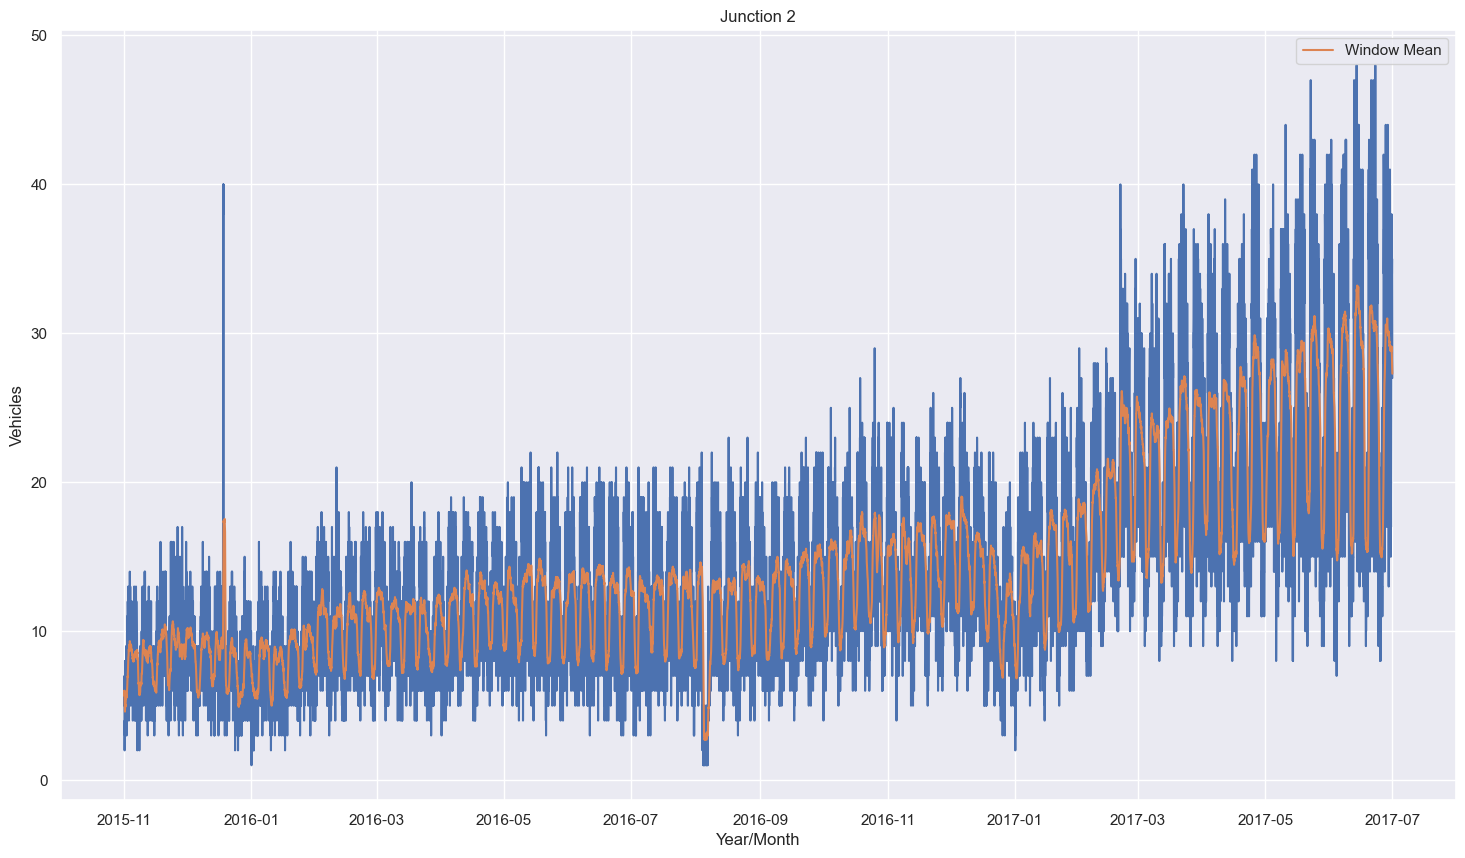

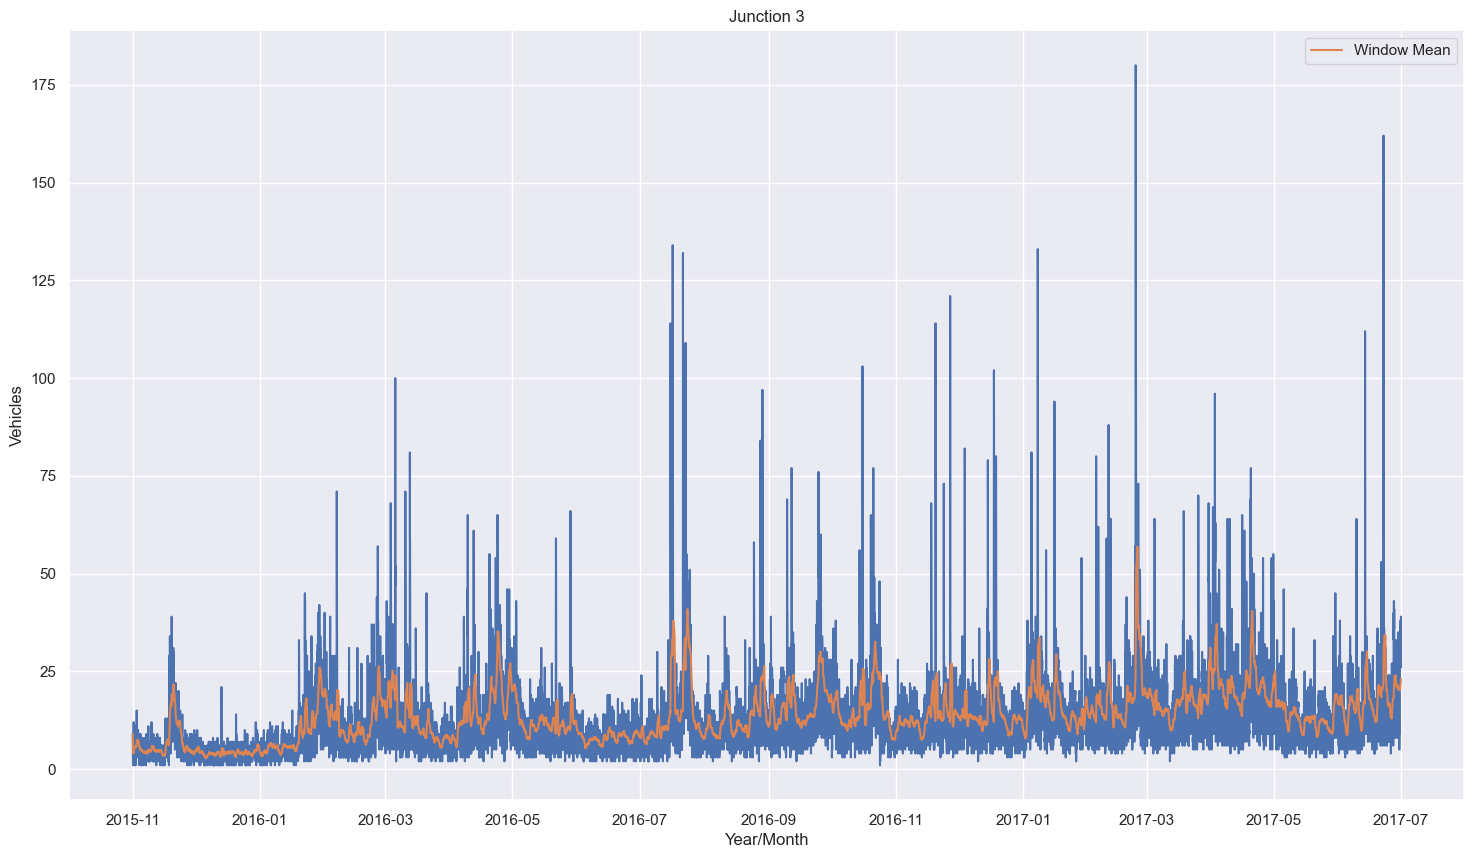

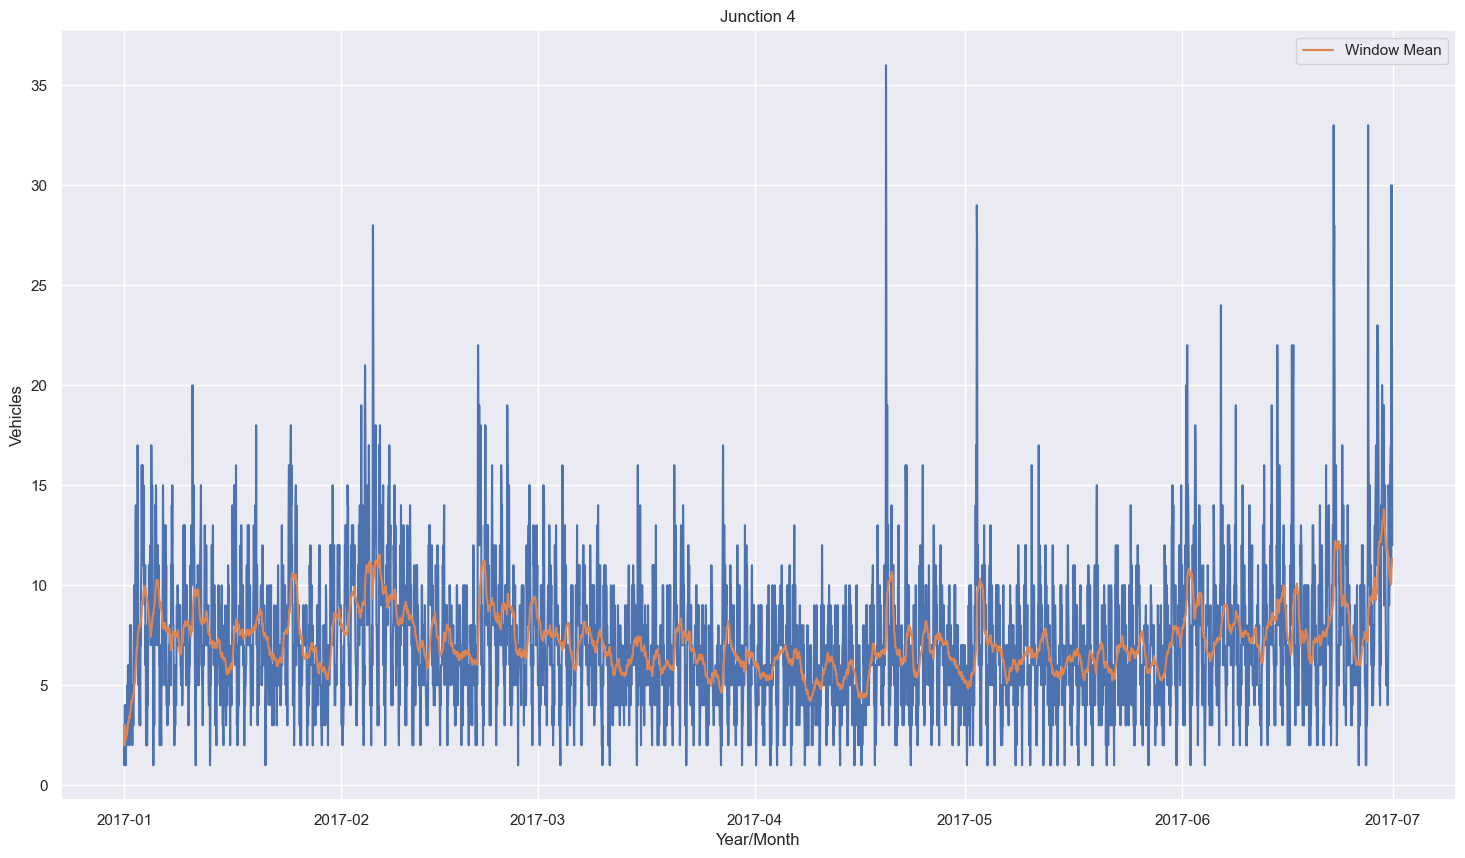

In [84]:
for index,junction in enumerate(junctions):
    plt.title('Junction %d' %(index+1))
    plt.plot(junction.DateTime, junction.Vehicles)
    plt.plot(junction.DateTime, junction.Vehicles.rolling(24, min_periods=1).mean(), label = "Window Mean")
    plt.xlabel("Year/Month")
    plt.ylabel("Vehicles")
    plt.legend()
    plt.show()

A time series is stationary if it does not have a trend or seasonality. However, in the EDA, I saw a weekly seasonality and an upwards trend over the years. In the above plot, it is again established that Junctions one and two have an upward trend. If we limit the span we will be able to further see the weekly seasonality. I will be spairing that step at this point and moving on with the respective transforms on datasets.


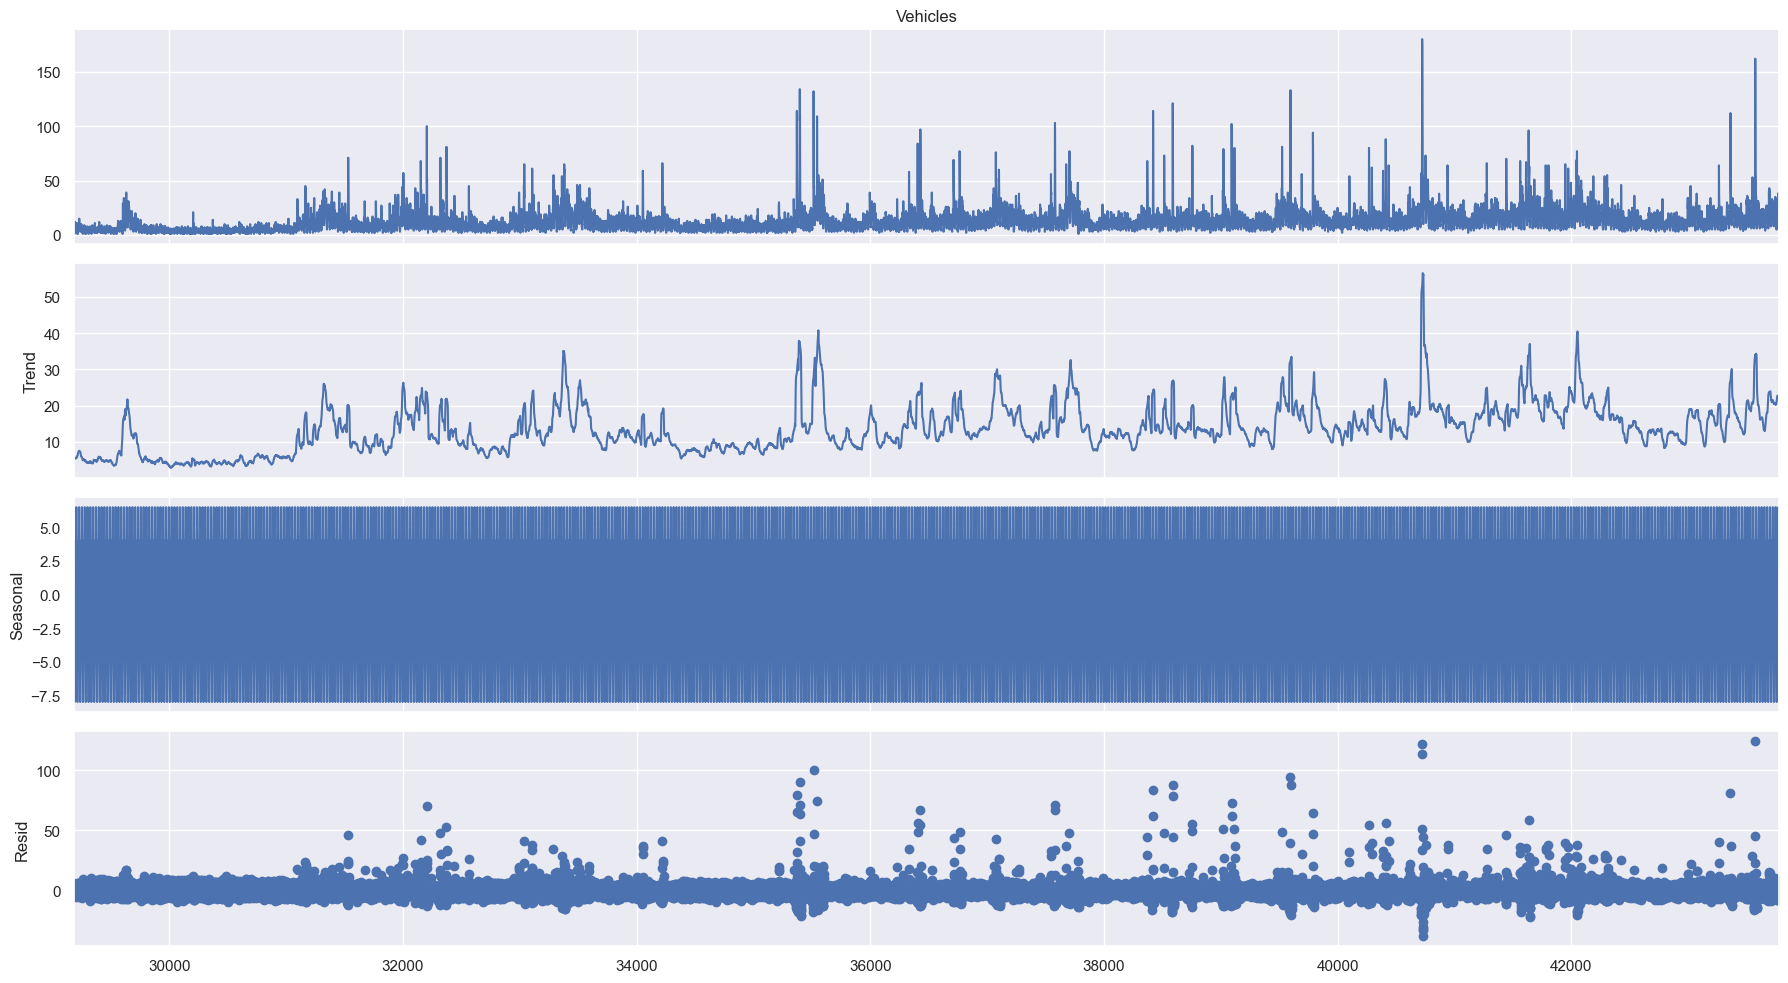

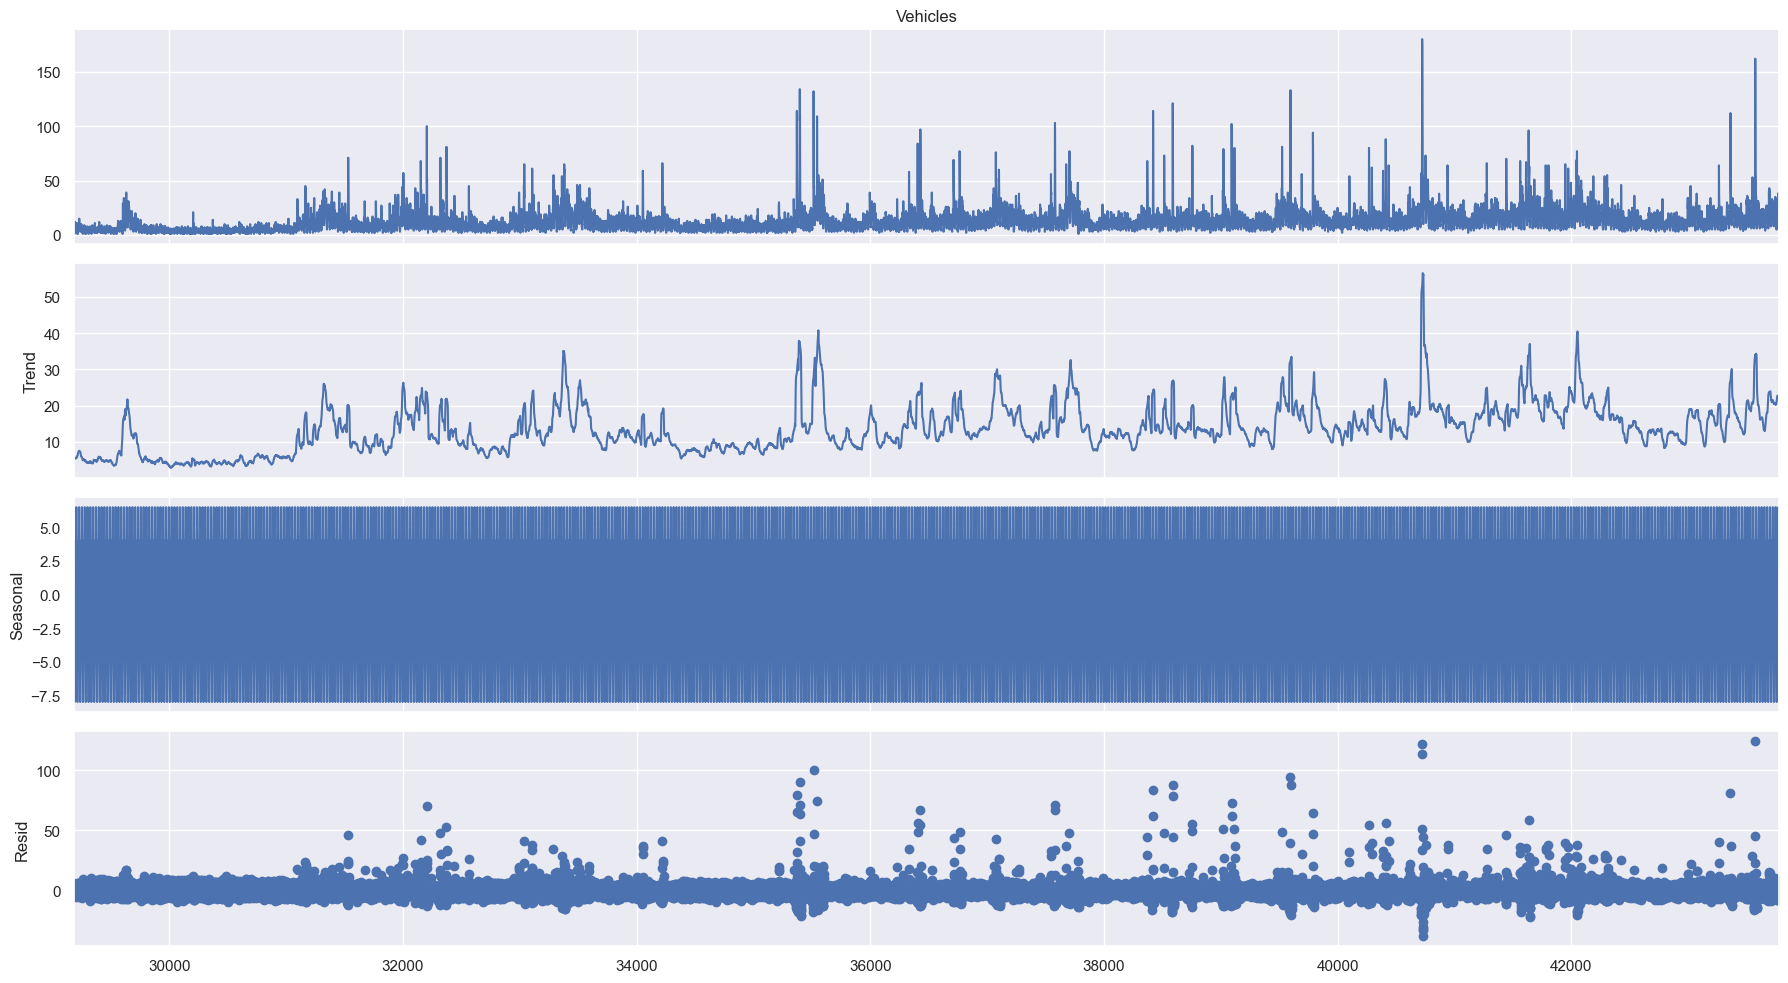

In [99]:
time_series_data = junction_3.Vehicles
result = sm.tsa.seasonal_decompose(time_series_data, model='additive', period=24)
result.plot()

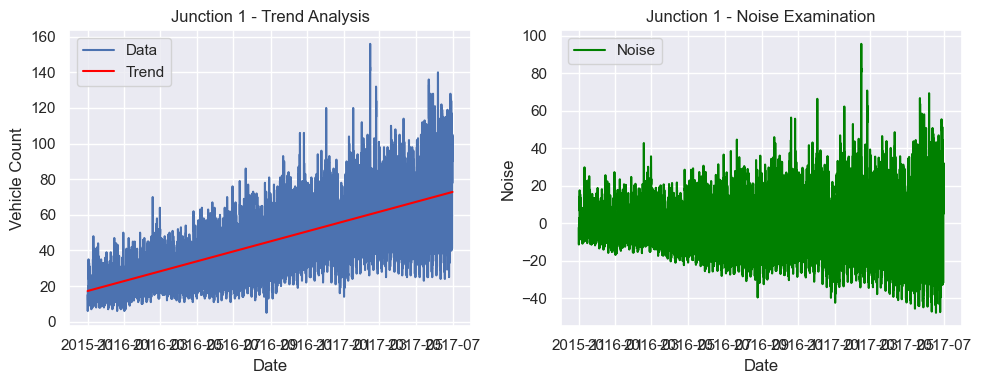

Junction 1 - Trend Slope: 0.0038097546911437423
Junction 1 - Trend Intercept: 17.25884035251518
Junction 1 - Mean Noise: 3.470128667845928e-14
Junction 1 - Standard Deviation of Noise: 16.486631390087474


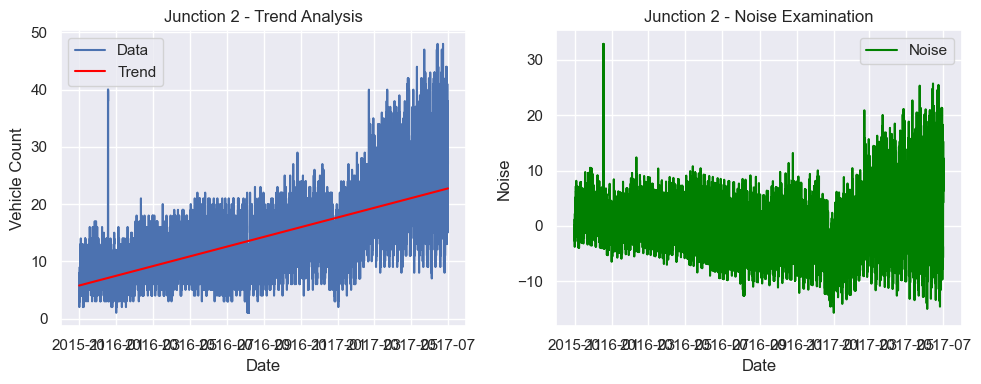

Junction 2 - Trend Slope: 0.0011630210418028587
Junction 2 - Trend Intercept: 5.768400932509691
Junction 2 - Mean Noise: 9.099933282541634e-15
Junction 2 - Standard Deviation of Noise: 5.547513523900225


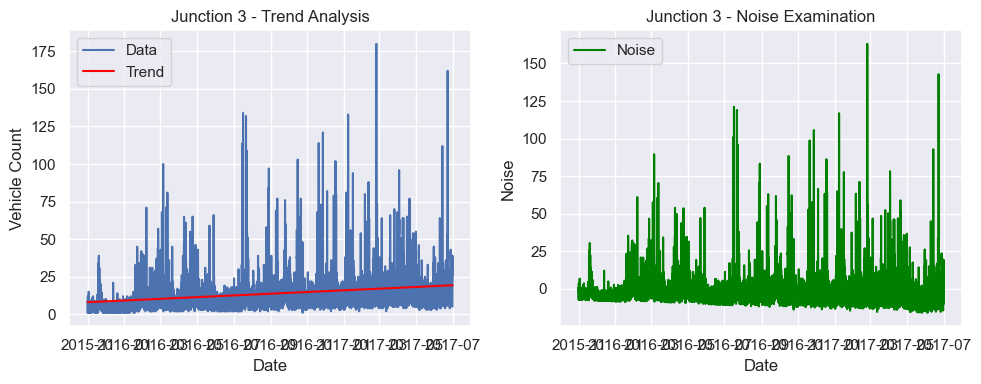

Junction 3 - Trend Slope: 0.0007725622288921174
Junction 3 - Trend Intercept: 8.057782675784226
Junction 3 - Mean Noise: -1.994505924940632e-15
Junction 3 - Standard Deviation of Noise: 9.915254195083062


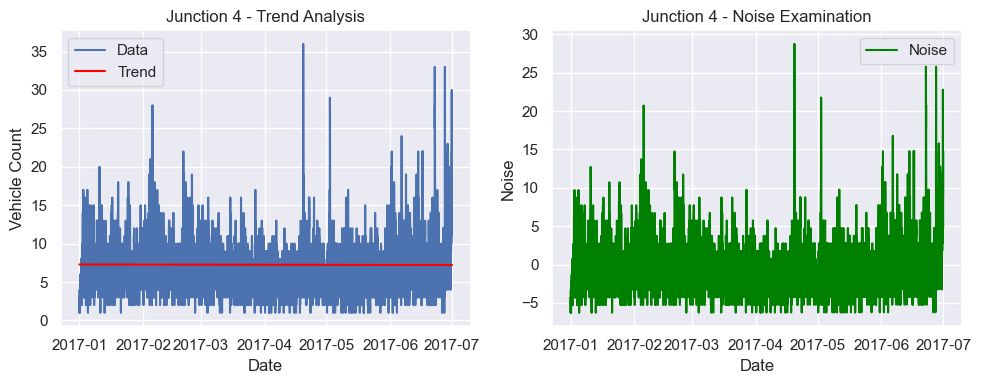

Junction 4 - Trend Slope: -1.5700269074005267e-05
Junction 4 - Trend Intercept: 7.285704552342071
Junction 4 - Mean Noise: 1.3896802677296986e-14
Junction 4 - Standard Deviation of Noise: 3.5209941540547938


In [103]:
junctions = data.groupby('Junction')

# Trend analysis and noise examination for each junction
for junction_id, junction_data in junctions:
    # Sort the data
    junction_data['DateTime'] = pd.to_datetime(junction_data['DateTime'])
    junction_data = junction_data.sort_values(by='DateTime')
    
    x = np.arange(len(junction_data))
    x = sm.add_constant(x)
    model = sm.OLS(junction_data['Vehicles'], x).fit()
    trend_slope = model.params[1]
    trend_intercept = model.params[0]
    
    detrended_data = junction_data['Vehicles'] - (trend_slope * x[:, 1] + trend_intercept)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(junction_data['DateTime'], junction_data['Vehicles'], label='Data')
    plt.plot(junction_data['DateTime'], trend_slope * x[:, 1] + trend_intercept, label='Trend', color='red')
    plt.xlabel('Date')
    plt.ylabel('Vehicle Count')
    plt.title(f'Junction {junction_id} - Trend Analysis')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(junction_data['DateTime'], detrended_data, label='Noise', color='green')
    plt.xlabel('Date')
    plt.ylabel('Noise')
    plt.title(f'Junction {junction_id} - Noise Examination')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    mean_noise = np.mean(detrended_data)
    std_noise = np.std(detrended_data)
    print(f'Junction {junction_id} - Trend Slope: {trend_slope}')
    print(f'Junction {junction_id} - Trend Intercept: {trend_intercept}')
    print(f'Junction {junction_id} - Mean Noise: {mean_noise}')
    print(f'Junction {junction_id} - Standard Deviation of Noise: {std_noise}')

Junction 2 - Trend Slope: This value expresses the slope of the trend calculated for Junction 2. The trend slope determines the long-term change of the time series. A positive slope indicates that the number of vehicles is increasing over time, while a negative slope indicates that it is decreasing. This value is approximately 0.0012, which seems to indicate that the number of vehicles in Junction 2 is trending towards a slow increase.

Junction 2 - Trend Intercept: This value represents the starting point of the trend calculated for Junction 2. The trend starting point represents the value at which the time series begins. This value is approximately 5.7684, indicating the starting value from which the time series begins.

Junction 2 - Mean Noise: This value represents the statistically calculated average of the noise calculated for Junction 2. Noise represents unpredictable fluctuations. Its mean value is very close to approximately 0, indicating that the noise is close to the center of the data.

Junction 2 - Standard Deviation of Noise: This value expresses the standard deviation of the noise calculated for Junction 2. Standard deviation measures how variable the data is. This value is approximately 5.5475, indicating that noise has a certain degree of variability over the data.